In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
best_ref = 9215

In [3]:
results = {}

In [4]:
with open('results_mlr.pkl', 'rb') as pickle_file:
    results['MLR'] = pickle.load(pickle_file)

print(results['MLR']["ate_estimate"])
print(results['MLR']["se_estimate"])
print(results['MLR']["CI"])

5896.198421134194
1250.0139479480117
[3446.21610298 8346.18073929]


In [5]:
with open('opt_params_knn.pkl', 'rb') as pickle_file:
    opt_dict_knn = pickle.load(pickle_file)

print(opt_dict_knn)

{'treat': {'n_neighbors': 40, 'p': 1}, 'control': {'n_neighbors': 50, 'p': 1}}


In [6]:
with open('results_knn.pkl', 'rb') as pickle_file:
    results['KNN'] = pickle.load(pickle_file)


print(results['KNN']["ate_estimate"])
print(results['KNN']["se_estimate"])
print(results['KNN']["CI"])

8486.253856278367
1241.7414838131629
[ 6321.71151273 10881.24012921]


In [7]:
with open('opt_params_rf.pkl', 'rb') as pickle_file:
    opt_dict_rf = pickle.load(pickle_file)

print(opt_dict_rf)

{'l': {'max_depth': 6, 'min_samples_leaf': 4, 'n_estimators': 300}, 'm': {'max_depth': 6, 'min_samples_leaf': 6, 'n_estimators': 500}}


In [8]:
with open('results_rf.pkl', 'rb') as pickle_file:
    results['Random Forest'] = pickle.load(pickle_file)

print(results['Random Forest']["ate_estimate"])
print(results['Random Forest']["se_estimate"])
print(results['Random Forest']["CI"])

8987.225671825534
1238.9585018835228
[ 6558.91162979 11415.53971386]


In [9]:
import pickle

with open('opt_params_xgb.pkl', 'rb') as pickle_file:
    opt_dict_xgb = pickle.load(pickle_file)

print(opt_dict_xgb)

{'l': {'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 140, 'reg_lambda': 0.01, 'subsample': 0.8}, 'm': {'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 80, 'reg_lambda': 100, 'subsample': 0.8}}


In [10]:
with open('results_xgb.pkl', 'rb') as pickle_file:
    results['XGBoost']  = pickle.load(pickle_file)

print(results['XGBoost']["ate_estimate"])
print(results['XGBoost']["se_estimate"])
print(results['XGBoost']["CI"])

9070.76087772417
1231.1278491091623
[ 6657.79463311 11483.72712234]


In [11]:
colors = ['tab:red', 'tab:orange', 'tab:green', 'tab:purple']

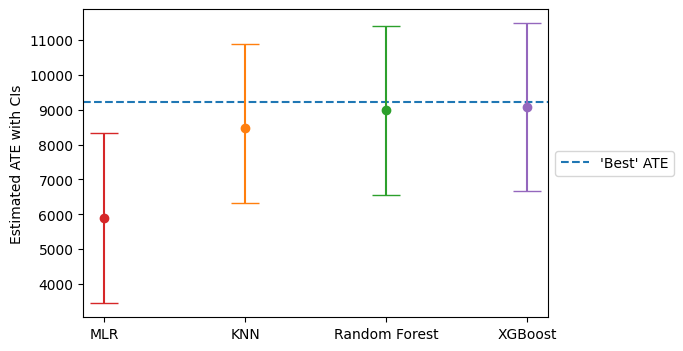

In [16]:
plt.figure(figsize=(6, 4))

plt.axhline(y=best_ref, color='tab:blue', linestyle='--', label="'Best' ATE")

for i, (ml_name, result) in enumerate(results.items()):
    plt.errorbar(ml_name, result['ate_estimate'], yerr=[[result['ate_estimate']-result['CI'][0]],[result['CI'][1]-result['ate_estimate']]], fmt='o', capsize=10, color=colors[i])

plt.ylabel('Estimated ATE with CIs')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.savefig(f'401k_ate.png', dpi=300, bbox_inches='tight')